In [1]:
from modules.general.F_search import *
from modules.graph.hist1D import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import h5py

In [12]:
INPUT = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon_all/DarkSUSY_all_NMuon_USER.h5'
hf = h5py.File(INPUT, 'r')

def find_Mu_Entries(vector, variable="Mu_Entries", file=hf):
    name_local_group = "MNeuL_" + str(vector[0]) + "/MNeuD_" + str(vector[1]) + \
                       "/MPhoD_" + str(vector[2]) + "/TcPhoD_" + str(vector[3]) + \
                       "/" + vector[4]
    # print(name_local_group)
    try:
        output = np.array(file.get(name_local_group + "/" + variable))
    except:
        output = None
    return output

def frec(data, number, porciento=.1, repetir=100):
    output = np.zeros(repetir)
    Nl = len(data)
    for i in range(repetir):
        if porciento <1:
            corte2, corte = train_test_split(data, test_size =porciento, shuffle = True)
        else:
            corte = data
        # print(len(corte), len(corte2))
        output[i] = float(np.sum(corte==number))/len(corte)
    #print(len(corte))
        # print(output[i], corte==number)
    return output

# graficar histograma especifico para este caso
def graficar_HISTG_ENTRIES(ax, vector, color="red"):
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

    ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="0 Sin muones")
    ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="1 muones")
    ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="2 muones")
    ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="3 muones")
    ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="4 muones")
    ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
    # ax.set_xlabel(" Porcentaje de Eventos")
    ax.set_ylabel(" Frecuencia Normalizada $f_N$")
    # ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
    #              "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
    #              ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
    ax.grid(True)
    return ax

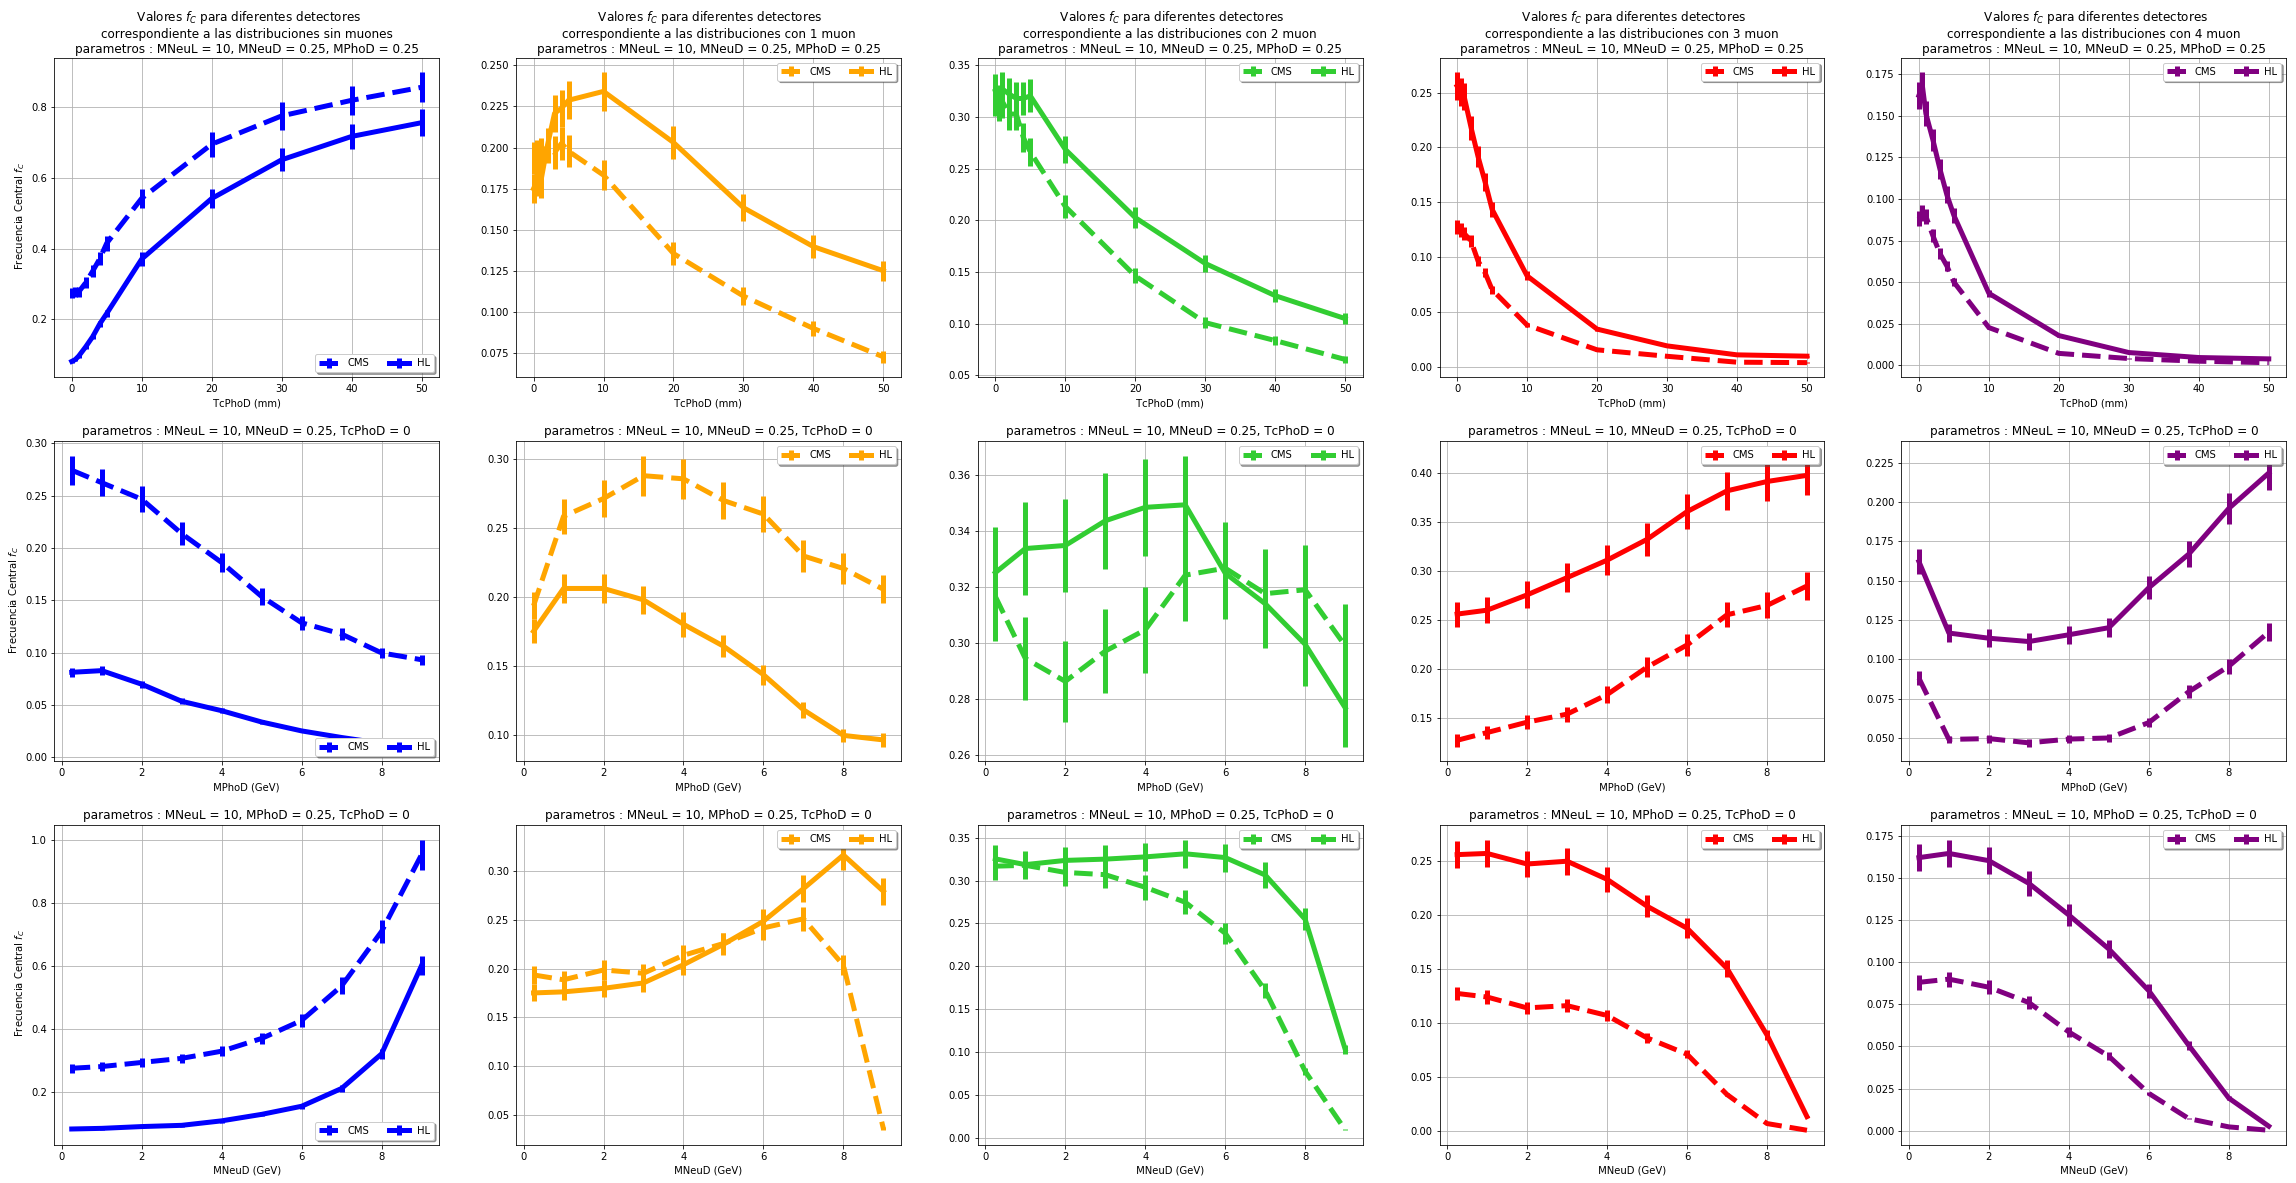

In [27]:
color0="blue"
color1="orange"
color2="limegreen"
color3="red"
color4="purple"

mmHL=5
mmCMS=5

plt.rcParams['figure.figsize'] = [40, 20]
fig = plt.figure()


X_TcPhoD = [0, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
Y_Entries_CMS_TcPhoD = np.zeros((len(X_TcPhoD), 5))
Y_Entries_HL_TcPhoD = np.zeros((len(X_TcPhoD), 5))
for iTcPhoD in range(len(X_TcPhoD)):
    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(3, 5, 1)
ax.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,0], color=color0, label="CMS",
            yerr=Y_Entries_CMS_TcPhoD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,0], color=color0, label="HL",
            yerr=Y_Entries_HL_TcPhoD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='lower right', shadow=True, ncol=4)
ax.set_ylabel(" Frecuencia Central $f_C$")
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Valores $f_C$ para diferentes detectores" + "\n" +
             "correspondiente a las distribuciones sin muones" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

ax = fig.add_subplot(3, 5, 2)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,1], color=color1, label="CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,1], color=color1, label="HL",
             yerr=Y_Entries_HL_TcPhoD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Valores $f_C$ para diferentes detectores" + "\n" +
             "correspondiente a las distribuciones con 1 muon" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

ax = fig.add_subplot(3, 5, 3)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,2], color=color2, label="CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,2], color=color2, label="HL",
             yerr=Y_Entries_HL_TcPhoD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Valores $f_C$ para diferentes detectores" + "\n" +
             "correspondiente a las distribuciones con 2 muon" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

ax = fig.add_subplot(3, 5, 4)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,3],  color=color3, label="CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,3],  color=color3, label="HL",
             yerr=Y_Entries_HL_TcPhoD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Valores $f_C$ para diferentes detectores" + "\n" +
             "correspondiente a las distribuciones con 3 muon" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

ax = fig.add_subplot(3, 5, 5)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,4], color=color4, label="CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,4], color=color4, label="HL",
             yerr=Y_Entries_HL_TcPhoD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Valores $f_C$ para diferentes detectores" + "\n" +
             "correspondiente a las distribuciones con 4 muon" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

## DATOS PARA LA SEGUNDA FILA ##
X_MPhoD = [0.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MPhoD = np.zeros((len(X_MPhoD), 5))
Y_Entries_HL_MPhoD = np.zeros((len(X_MPhoD), 5))
for iMPhoD in range(len(X_MPhoD)):
    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(3, 5, 6)
ax.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,0], color=color0, label="CMS",
            yerr=Y_Entries_CMS_MPhoD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,0], color=color0, label="HL",
            yerr=Y_Entries_HL_MPhoD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='lower right', shadow=True, ncol=4)
ax.set_ylabel(" Frecuencia Central $f_C$")
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 7)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,1], color=color1, label="CMS",
             yerr=Y_Entries_CMS_MPhoD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,1], color=color1, label="HL",
             yerr=Y_Entries_HL_MPhoD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 8)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,2], color=color2, label="CMS",
             yerr=Y_Entries_CMS_MPhoD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,2], color=color2, label="HL",
             yerr=Y_Entries_HL_MPhoD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 9)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,3],  color=color3, label="CMS",
             yerr=Y_Entries_CMS_MPhoD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,3],  color=color3, label="HL",
             yerr=Y_Entries_HL_MPhoD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 10)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,4], color=color4, label="CMS",
             yerr=Y_Entries_CMS_MPhoD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,4], color=color4, label="HL",
             yerr=Y_Entries_HL_MPhoD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))

## DATOS PARA LA TERCERO FILA ##
X_MNeuD = [0.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MNeuD = np.zeros((len(X_MNeuD), 5))
Y_Entries_HL_MNeuD = np.zeros((len(X_MNeuD), 5))
for iMNeuD in range(len(X_MNeuD)):
    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(3, 5, 11)
ax.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,0], color=color0, label="CMS",
            yerr=Y_Entries_CMS_MNeuD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,0], color=color0, label="HL",
            yerr=Y_Entries_HL_MNeuD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='lower right', shadow=True, ncol=4)
ax.set_ylabel(" Frecuencia Central $f_C$")
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))


ax = fig.add_subplot(3, 5, 12)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,1], color=color1, label="CMS",
             yerr=Y_Entries_CMS_MNeuD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,1], color=color1, label="HL",
             yerr=Y_Entries_HL_MNeuD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 13)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,2], color=color2, label="CMS",
             yerr=Y_Entries_CMS_MNeuD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,2], color=color2, label="HL",
             yerr=Y_Entries_HL_MNeuD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 14)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,3],  color=color3, label="CMS",
             yerr=Y_Entries_CMS_MNeuD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,3],  color=color3, label="HL",
             yerr=Y_Entries_HL_MNeuD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 5, 15)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,4], color=color4, label="CMS",
             yerr=Y_Entries_CMS_MNeuD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,4], color=color4, label="HL",
             yerr=Y_Entries_HL_MNeuD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))


fig.savefig("Comparacion_Distribucion_Entries.pdf")
fig.savefig("Comparacion_Distribucion_Entries.png")
plt.show()


In [ ]:
color = "red"

plt.rcParams['figure.figsize'] = [30, 4]
fig = plt.figure()

ax = fig.add_subplot(1, 3, 1)
vector = [10, 0.25, 0.25, 0, "_CMS_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="Sin muones")
ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="1 muones")
ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="2 muones")
ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="3 muones")
ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="4 muones")
ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
ax.set_xlabel(" Porcentaje de Eventos")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_title(" Distribucion de eventos para la configuracion CMS y" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.grid(True)
print(frec(Mu_Entries, 0, 1, repetir=1), frec(Mu_Entries, 1, 1, repetir=1),
      frec(Mu_Entries, 2, 1, repetir=1), frec(Mu_Entries, 3, 1, repetir=1),
      frec(Mu_Entries, 4, 1, repetir=1))

ax = fig.add_subplot(1, 2, 2)
vector = [10, 0.25, 0.25, 0, "_HL_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="Sin muones")
ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="1 muones")
ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="2 muones")
ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="3 muones")
ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
        alpha=0.7, density=1, label="4 muones")
ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
           ymin=0, ymax=50, color=color, linestyle=':')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
ax.set_xlabel(" Porcentaje de Eventos")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_title(" Distribucion de eventos para la configuracion HL y" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.grid(True)
plt.show()
print(frec(Mu_Entries, 0, 1, repetir=1), frec(Mu_Entries, 1, 1, repetir=1),
      frec(Mu_Entries, 2, 1, repetir=1), frec(Mu_Entries, 3, 1, repetir=1),
      frec(Mu_Entries, 4, 1, repetir=1))

plt.grid(True)

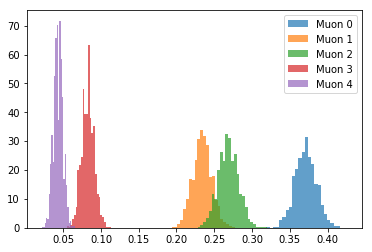

(array([0.371]), array([0.2342]), array([0.2687]), array([0.0828]), array([0.0433]))
(array([0.8664]), array([0.0727]), array([0.0588]), array([0.0015]), array([0.0006]))


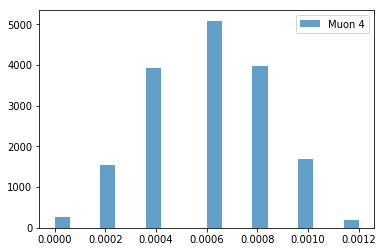

In [ ]:
vector = [10, 0.25, 0.25, 10, "_HL_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
plt.hist(frec(Mu_Entries, 0, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 1, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 2, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 3, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 4, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.legend(["Muon 0", "Muon 1", "Muon 2", "Muon 3", "Muon 4"])
plt.show()
print(frec(Mu_Entries, 0, 1, repetir=1), frec(Mu_Entries, 1, 1, repetir=1),
      frec(Mu_Entries, 2, 1, repetir=1), frec(Mu_Entries, 3, 1, repetir=1),
      frec(Mu_Entries, 4, 1, repetir=1))

vector = [10, 0.25, 0.25, 100, "_HL_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
#plt.hist(frec(Mu_Entries, 0, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
#plt.hist(frec(Mu_Entries, 1, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
#plt.hist(frec(Mu_Entries, 2, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
#plt.hist(frec(Mu_Entries, 3, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 4, .5, repetir=5000),  bins=20, alpha=0.7, normed=1)
plt.legend(["Muon 4"])
plt.show()
print(frec(Mu_Entries, 0, 1, repetir=1), frec(Mu_Entries, 1, 1, repetir=1),
      frec(Mu_Entries, 2, 1, repetir=1), frec(Mu_Entries, 3, 1, repetir=1),
      frec(Mu_Entries, 4, 1, repetir=1))

(array([  1.08695652,   1.08695652,   9.7826087 ,  19.56521739,
         56.52173913, 116.30434783,  90.2173913 , 285.86956522,
        377.17391304, 528.26086957, 644.56521739, 759.7826087 ,
        329.34782609, 622.82608696, 525.        , 408.69565217,
        302.17391304, 154.34782609,  53.26086957,  78.26086957,
         40.2173913 ,  16.30434783,   9.7826087 ,   3.26086957,
          1.08695652]),
 array([0.0021  , 0.002284, 0.002468, 0.002652, 0.002836, 0.00302 ,
        0.003204, 0.003388, 0.003572, 0.003756, 0.00394 , 0.004124,
        0.004308, 0.004492, 0.004676, 0.00486 , 0.005044, 0.005228,
        0.005412, 0.005596, 0.00578 , 0.005964, 0.006148, 0.006332,
        0.006516, 0.0067  ]),
 <a list of 25 Patch objects>)

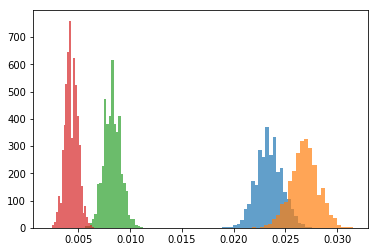

In [49]:
vector = [10, 0.25, 0.25, 10, "_HL_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
plt.hist(frec(Mu_Entries, 1, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 2, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 3, .1, repetir=5000),  bins=25, alpha=0.7, normed=1)
plt.hist(frec(Mu_Entries, 4, .5, repetir=5000),  bins=25, alpha=0.7, normed=1)

In [42]:
vector = [10, 0.25, 0.25, 0, "_HL_"]
Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
print(frec(Mu_Entries, 0, 1, repetir=1))
print(frec(Mu_Entries, 1, 1, repetir=1))
print(frec(Mu_Entries, 2, 1, repetir=1))
print(frec(Mu_Entries, 3, 1, repetir=1))
print(frec(Mu_Entries, 4, 1, repetir=1))

print(frec(Mu_Entries, 0, 1, repetir=1) + frec(Mu_Entries, 1, 1, repetir=1)+
      frec(Mu_Entries, 2, 1, repetir=1) + frec(Mu_Entries, 3, 1, repetir=1)+
      frec(Mu_Entries, 4, 1, repetir=1))

MNeuL_10/MNeuD_0.25/MPhoD_0.25/TcPhoD_0/_HL_
[0.0813]
[0.175]
[0.3252]
[0.256]
[0.1622]
[0.9997]


In [ ]:
float(np.sum(Mu_Entries==4))/len(Mu_Entries)

In [ ]:
plt.hist(Mu_Entries-0.5,  bins=5, alpha=0.7, normed=1)

print(vector[4])

In [29]:
train_test_split(Mu_Entries, test_size =.1, shuffle = True)

NameError: name 'train_test_split' is not defined